# IMPORTS DE LIBRAIRIES

In [9]:
import torch 
print("torch version           : ", torch.__version__)
print("torch cuda version      : ", torch.version.cuda)
print("torch.cuda.is_available : ", torch.cuda.is_available())

torch version           :  2.5.1
torch cuda version      :  11.8
torch.cuda.is_available :  True


In [10]:
import detectron2
print("detectron2 version : ", detectron2.__version__)

detectron2 version :  0.1.3


In [11]:
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os, json, cv2, random, glob


# LECTURE D'UNE IMAGE
## /!\ CHANGE THE IMAGE PATH ACCORDING TO THE IMAGE TO SEGMENT

In [13]:
def imBGRshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [14]:
def imRGBshow(img):
    plt.imshow(img)
    plt.show()

In [15]:
#im_path = "../demo/input1.jpg" # A MODIFIER POUR CORRESPONDRE AU CHEMIN POUR L'IMAGE DESIREE
im_path = "/projects/INSA-Image/B01/Data/Cross-val/Xval0/images/Augmented0T10P3F3.png" # A MODIFIER POUR CORRESPONDRE AU CHEMIN POUR L'IMAGE DESIREE
im = cv2.imread(im_path)

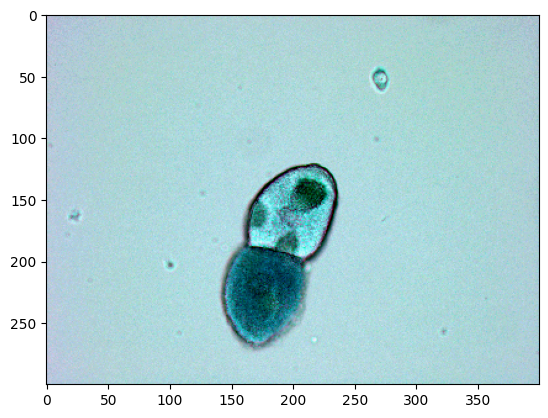

In [16]:
imBGRshow(im)

# INFERENCE SIMPLE SUR L'IMAGE EN SEGMENTATION 
## AVEC LE MODELE MASK_RCNN_50_FPN_3x

In [17]:
# CREATE CONFIG
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_TRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")


In [18]:
# CREATE PREDICTOR
predictor = DefaultPredictor(cfg)

In [ ]:
# PREDICT
output = predictor(im)

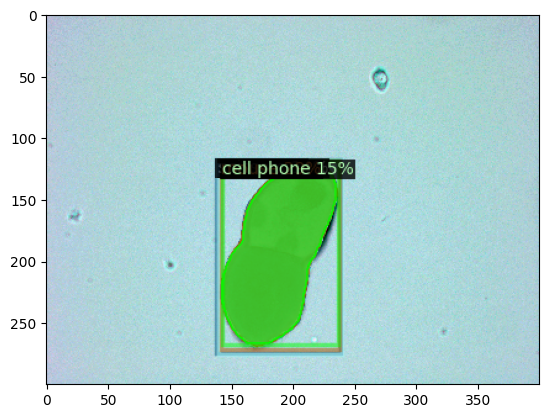

In [20]:
# VISUALIZE OUTPUT
v = Visualizer(im[:, :, ::-1], metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(output["instances"].to("cpu"))
imRGBshow(out.get_image())